In [1]:
%pylab inline
import pandas as pd
from scipy.interpolate import interp1d
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


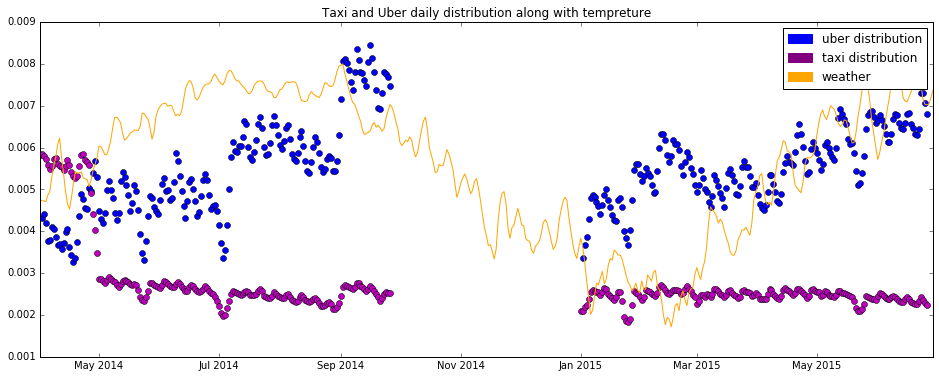

In [2]:
from scipy.interpolate import spline
import matplotlib.patches as mpatches

# read weather data
data = np.load("weather_mod.npy")
days = data[:,0]
tempreture = data[:, 1]
weather = [i*1.0/10000 for i in tempreture]

def read_data(f_name):
    days_taxi = []
    ratio_taxi = []
    # read taxi day distribution
    with open(f_name, "r") as f:
        next(f)
        for row in f:
            days_taxi.append(row.split("\t")[0])
            ratio_taxi.append(float(row.split("\t")[1].strip()))
    return days_taxi, ratio_taxi    
    
days_taxi, ratio_taxi = read_data("taxi_day_dist.txt")
days_taxi = pd.to_datetime(days_taxi[:-1])
ratio_taxi = ratio_taxi[:-1]

days_taxi_2014 = days_taxi[:183]
days_taxi_2015 = days_taxi[183:]
ratio_taxi_2014 = ratio_taxi[:183]
ratio_taxi_2015 = ratio_taxi[183:]

# read uber day distribution
days_uber_2014, ratio_uber_2014 = read_data("uber_day_dist2014.txt")
days_uber_2014 = pd.to_datetime(days_uber_2014[:-1])
ratio_uber_2014 = ratio_uber_2014[:-1]
days_uber_2014, ratio_uber_2014 = zip(*sorted(zip(days_uber_2014, ratio_uber_2014)))

days_uber_2015, ratio_uber_2015 = read_data("uber_day_dist2015.txt")
days_uber_2015 = pd.to_datetime(days_uber_2015[:-1])
ratio_uber_2015 = ratio_uber_2015[:-1]
days_uber_2015, ratio_uber_2015 = zip(*sorted(zip(days_uber_2015, ratio_uber_2015)))

figure(figsize=[16,6])

days_weather = days[455:914]
weather = weather[455:914]


avg_weather = [(weather[:-4][i] + weather[1:-3][i] + weather[2:-2][i] 
               + weather[3:-1][i]+ weather[4:][i]) / 5 for i in range(len(weather)-4)]

avg_ratio_uber_2014 = [(ratio_uber_2014[:-4][i] + ratio_uber_2014[1:-3][i]+ratio_uber_2014[2:-2][i] \
                        +ratio_uber_2014[3:-1][i]+ratio_uber_2014[4:][i]) / 5 for i in range(len(days_uber_2014)-4)]
avg_ratio_uber_2015 = [(ratio_uber_2015[:-4][i] + ratio_uber_2015[1:-3][i]+ratio_uber_2015[2:-2][i] \
                       +ratio_uber_2015[3:-1][i] + ratio_uber_2015[4:][i]) / 5 for i in range(len(days_uber_2015)-4)]

avg_ratio_taxi_2014 = [(ratio_taxi_2014[:-4][i] + ratio_taxi_2014[1:-3][i]+ratio_taxi_2014[2:-2][i] \
                        +ratio_taxi_2014[3:-1][i]+ratio_taxi_2014[4:][i]) / 5 for i in range(len(days_taxi_2014)-4)]
avg_ratio_taxi_2015 = [(ratio_taxi_2015[:-4][i] + ratio_taxi_2015[1:-3][i]+ratio_taxi_2015[2:-2][i] \
                       +ratio_taxi_2015[3:-1][i] + ratio_taxi_2015[4:][i]) / 5 for i in range(len(days_taxi_2015)-4)]

uber = plot(days_uber_2014[:-4], avg_ratio_uber_2014, 'bo',days_uber_2015[:-4], avg_ratio_uber_2015, 'bo')
taxi = plot(days_taxi_2014[:-4], avg_ratio_taxi_2014, 'mo', days_taxi_2015[:-4], avg_ratio_taxi_2015, 'mo')
weather = plot(days_weather[:-4], avg_weather, 'orange')

title("Taxi and Uber daily distribution along with tempreture")
#legend([uber, taxi, weather])
uber_patch = mpatches.Patch(color='blue', label = "uber distribution")
taxi_patch = mpatches.Patch(color='purple', label = "taxi distribution")
weather_patch = mpatches.Patch(color='orange', label = "weather")

legend(handles=[uber_patch, taxi_patch, weather_patch])


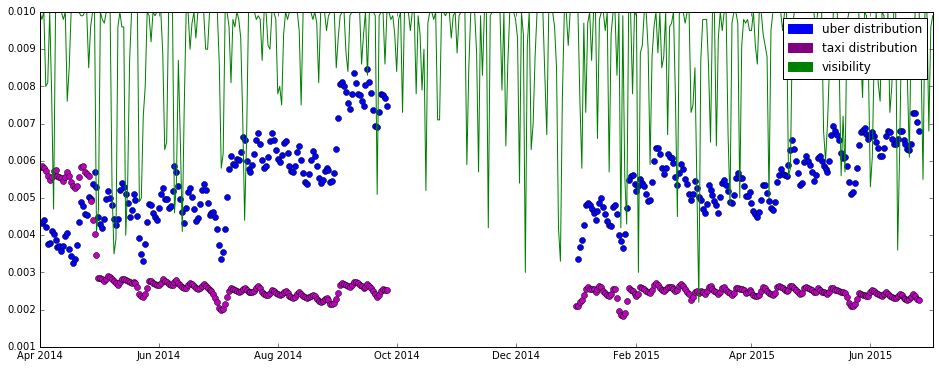

In [3]:
visib = data[:, 2]
visib = [i*1.0/1000 for i in visib]

figure(figsize=[16,6])
plot(days_uber_2014[:-4], avg_ratio_uber_2014, 'bo',days_uber_2015[:-4], avg_ratio_uber_2015, 'bo')
plot(days_taxi_2014[:-4], avg_ratio_taxi_2014, 'mo', days_taxi_2015[:-4], avg_ratio_taxi_2015, 'mo')
visib = visib[455:914]

plot(days_weather, visib, 'g')
uber_patch = mpatches.Patch(color='blue', label = "uber distribution")
taxi_patch = mpatches.Patch(color='purple', label = "taxi distribution")
visib_patch = mpatches.Patch(color='green', label = "visibility")
legend(handles=[uber_patch, taxi_patch, visib_patch])

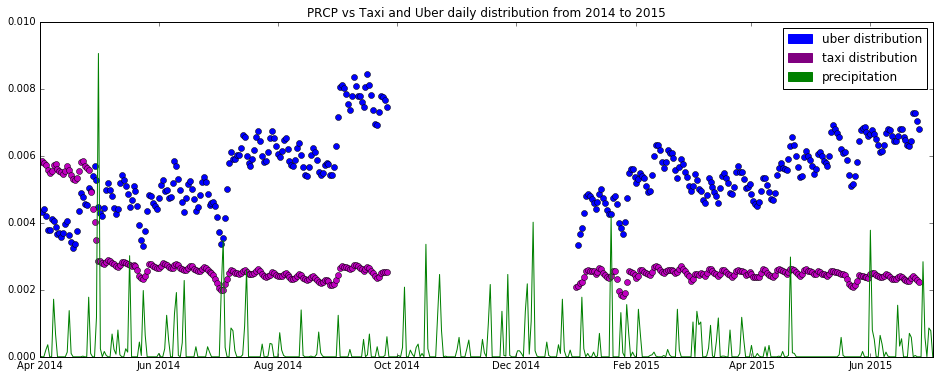

In [4]:
prcp = data[:, 3]
prcp = [i*1.0/500 for i in prcp]

figure(figsize=[16,6])
plot(days_uber_2014[:-4], avg_ratio_uber_2014, 'bo',days_uber_2015[:-4], avg_ratio_uber_2015, 'bo')
plot(days_taxi_2014[:-4], avg_ratio_taxi_2014, 'mo', days_taxi_2015[:-4], avg_ratio_taxi_2015, 'mo')
prcp = prcp[455:914]

plot(days_weather, prcp, 'g')
title("PRCP vs Taxi and Uber daily distribution from 2014 to 2015")
uber_patch = mpatches.Patch(color='blue', label = "uber distribution")
taxi_patch = mpatches.Patch(color='purple', label = "taxi distribution")
prcp_patch = mpatches.Patch(color='green', label = "precipitation")
legend(handles=[uber_patch, taxi_patch, prcp_patch])

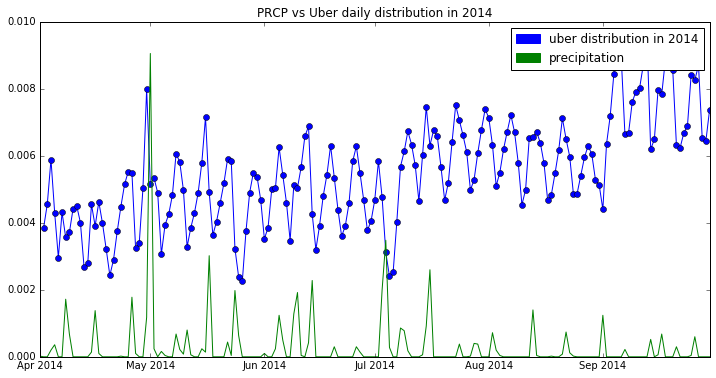

In [5]:
figure(figsize=[12,6])
plot(days_uber_2014, ratio_uber_2014, 'bo-')

days_weather_2014 = days_weather[:183]
prcp_2014 = prcp[:183]
plot(days_weather_2014, prcp_2014, 'g')
title("PRCP vs Uber daily distribution in 2014")
uber_patch = mpatches.Patch(color='blue', label = "uber distribution in 2014")
prcp_patch = mpatches.Patch(color='green', label = "precipitation")
legend(handles=[uber_patch, prcp_patch])

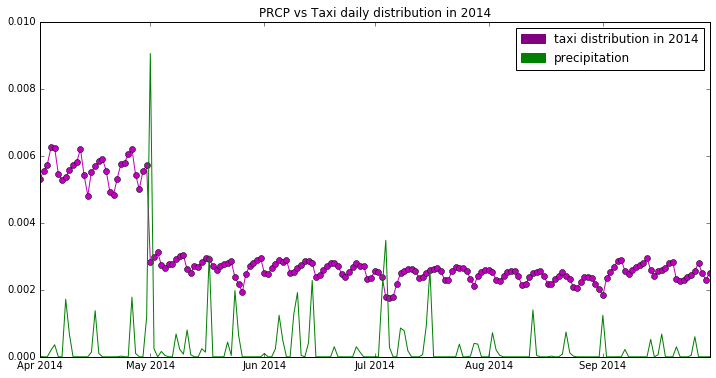

In [6]:
figure(figsize=[12,6])
plot(days_taxi_2014, ratio_taxi_2014, 'mo-')
plot(days_weather_2014, prcp_2014, 'g')
title("PRCP vs Taxi daily distribution in 2014")
taxi_patch = mpatches.Patch(color='purple', label = "taxi distribution in 2014")
prcp_patch = mpatches.Patch(color='green', label = "precipitation")
legend(handles=[taxi_patch, prcp_patch])